# Time Series Anomaly Detection Exercises
---
file name: `time_series_anomaly_detection.py` or `time_series_anomaly_detection.ipynb`

The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is `curriculum_logs`.

In [38]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# ignore pink warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
# get data

# function to generate url
def get_url(db):
    '''
    This function takes in a database name and returns a url (using the specified 
    database name as well as host, user, and password from env.py) for use in the 
    pandas.read_sql() function.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
# generate url
url = get_url('curriculum_logs')
# write sql query
sql = '''
SELECT date, time, path, ip, user_id, name, program_id, start_date, end_date
FROM logs
JOIN cohorts ON logs.cohort_id = cohorts.id;
'''
# read query result into dataframe
logs = pd.read_sql(sql, url)
# view info
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847330 entries, 0 to 847329
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        847330 non-null  object
 1   time        847330 non-null  object
 2   path        847329 non-null  object
 3   ip          847330 non-null  object
 4   user_id     847330 non-null  int64 
 5   name        847330 non-null  object
 6   program_id  847330 non-null  int64 
 7   start_date  847330 non-null  object
 8   end_date    847330 non-null  object
dtypes: int64(2), object(7)
memory usage: 58.2+ MB


### 1. Label students by the program they are in.

In [13]:
# preview data
logs.head()

,date,time,path,ip,user_id,name,program_id,start_date,end_date
0,2018-01-26,09:55:03,/,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06
1,2018-01-26,09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06
3,2018-01-26,09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06
4,2018-01-26,09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17


I have the program ids for each student, but I don't know what each id represents. I'd like to look into this a little more so I can create a new column of program titles. I do already know that Florence was a data science program so 3=Data Science. I can find the information I'm missing by looking at alumni.codeup.com

- 1 = Web Dev - PHP
- 2 = Web Dev - Java
- 3 = Data Science
- 4 = Front-End

In [17]:
# create column for program names
logs['program_name'] = logs.program_id.replace([1, 2, 3, 4], ['WebDev-PHP', 'WebDev-Java', 'DataSci', 'FrontEnd'])
logs.head()

,date,time,path,ip,user_id,name,program_id,start_date,end_date,program_name
0,2018-01-26,09:55:03,/,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
1,2018-01-26,09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
3,2018-01-26,09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
4,2018-01-26,09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java


### 2. Is it possible to identify the user_id of a staff member?

In [14]:
# identify user_id of staff members
logs[logs.name == 'Staff'].user_id.unique()

array([ 53, 314,  40,  64,  11, 211,   1, 312, 146, 248, 370, 397, 404,
       257, 428, 461,  37, 514, 539, 545, 546, 572, 315,  41, 592, 618,
       620, 521, 652, 502, 653, 480, 738, 742, 745, 813, 430, 816, 581,
       854, 855, 744, 893, 148, 894, 513, 630, 308, 951, 953, 980])

### 3. Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.

In [15]:
# identify students accessing curriculum after program end date
logs[(logs.date > logs.end_date) & (logs.name != 'Staff')]

,date,time,path,ip,user_id,name,program_id,start_date,end_date
0,2018-01-26,09:55:03,/,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06
1,2018-01-26,09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06
3,2018-01-26,09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06
30,2018-01-26,10:14:47,/,97.105.19.61,11,Arches,1,2014-02-04,2014-04-22
...,...,...,...,...,...,...,...,...,...
847201,2021-04-21,15:20:12,classification/classical_programming_vs_machin...,96.8.130.134,692,Darden,3,2020-07-13,2021-01-12
847202,2021-04-21,15:20:12,classification/scale_features_or_not.svg,96.8.130.134,692,Darden,3,2020-07-13,2021-01-12
847203,2021-04-21,15:20:14,classification/project,96.8.130.134,692,Darden,3,2020-07-13,2021-01-12
847204,2021-04-21,15:20:18,classification/acquire,96.8.130.134,692,Darden,3,2020-07-13,2021-01-12


### 4. Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2.

In [27]:
def single_user(df, u_id):
    '''
    This function takes in a dataframe and a user id and returns a series of data
    only for that user.
    '''
    df = df[df.user_id == u_id]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    single_user = df['path'].resample('D').count()
    return single_user
# test function
single_user(logs, 1)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


date
2018-01-26     7
2018-01-27     1
2018-01-28     0
2018-01-29     6
2018-01-30     5
              ..
2021-04-17     0
2021-04-18     8
2021-04-19    10
2021-04-20    11
2021-04-21    12
Freq: D, Name: path, Length: 1182, dtype: int64

In [31]:
# function to get bollinger bands
def band_data(single_user, span, k, u_id):
    '''
    This function computes the %b of a bollinger band range using the data of 
    a single user's curriculum log activity
    '''
    # Calculate upper and lower bollinger band
    midband = single_user.ewm(span=span).mean()
    stdev = single_user.ewm(span=span).std()
    upper = midband + stdev*k
    lower = midband - stdev*k
    
    # Add upper and lower band values to dataframe
    bands = pd.concat([upper, lower], axis=1)
    
    # Combine all data into a single dataframe
    df = pd.concat([single_user, midband, bands], axis=1)
    df.columns = ['n_pages', 'midband', 'upper', 'lower']
    
    # Calculate percent b and relevant user id to dataframe
    df['pct_b'] = (df['n_pages'] - df['lower'])/(df['upper'] - df['lower'])
    df['user_id'] = u_id
    return df
# test function
band_data(single_user(logs, 1), 30, 2, 1)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,n_pages,midband,upper,lower,pct_b,user_id
date,,,,,,
2018-01-26,7,7.000000,NaN,NaN,NaN,1
2018-01-27,1,3.900000,12.385281,-4.585281,0.329116,1
2018-01-28,0,2.512403,9.978877,-4.954072,0.331754,1
2018-01-29,6,3.473363,10.465263,-3.518537,0.680683,1
2018-01-30,5,3.820710,9.941925,-2.300505,0.596328,1
...,...,...,...,...,...,...
2021-04-17,0,8.666278,34.752849,-17.420294,0.333894,1
2021-04-18,8,8.623292,33.856529,-16.609946,0.487649,1
2021-04-19,10,8.712112,33.127499,-15.703276,0.526375,1


In [34]:
# function to identify anomalous activity
def find_anomalies(df, u_id, span, k):
    '''
    This function takes in a dataframe of a single user's activity, that user's user_id,
    a number of time periods, and a k-value to determine bollinger bands. It returns the 
    records where a user's daily activity exceeded the limit of a bollinger band range.
    '''
    # Reduce dataframe to represent a single user
    n_pages_user = single_user(df, u_id)
    # Add bollinger band data to dataframe
    df = band_data(n_pages_user, span, k, u_id)   
    # Return only records that sit outside of bollinger band upper limit
    return df[(df.pct_b>1) | (df.pct_b<0)]
# test function
find_anomalies(logs, 1, 30, 2)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,n_pages,midband,upper,lower,pct_b,user_id
date,,,,,,
2018-02-20,54,6.456745,35.718248,-22.804758,1.312386,1
2018-03-19,35,9.304089,32.368632,-13.760453,1.057044,1
2018-05-04,27,7.179313,24.736171,-10.377545,1.064471,1
2018-05-11,27,8.141119,26.687629,-10.405390,1.008421,1
2018-05-29,68,9.612443,44.787234,-25.562347,1.329963,1
2018-07-25,32,5.833712,24.720784,-13.053359,1.192704,1
2018-07-31,35,7.286941,29.438752,-14.864871,1.125526,1
2018-08-07,34,8.843526,31.764520,-14.077468,1.048765,1
2018-11-07,13,1.221442,8.090149,-5.647265,1.357407,1


In [39]:
# use for loop to iterate through each student's user_id
# create empty dataframe
anomalies = pd.DataFrame()
for u in list(logs[logs.name != 'Staff'].user_id.unique()):
    user_df = find_anomalies(logs, u, 30, 2)
    anomalies = pd.concat([anomalies, user_df], axis=0)    

In [40]:
anomalies

,n_pages,midband,upper,lower,pct_b,user_id
date,,,,,,
2018-02-20,54,6.456745,35.718248,-22.804758,1.312386,1
2018-03-19,35,9.304089,32.368632,-13.760453,1.057044,1
2018-05-04,27,7.179313,24.736171,-10.377545,1.064471,1
2018-05-11,27,8.141119,26.687629,-10.405390,1.008421,1
2018-05-29,68,9.612443,44.787234,-25.562347,1.329963,1
...,...,...,...,...,...,...
2021-03-25,16,4.929382,15.757106,-5.898343,1.011216,948
2021-03-29,28,6.004114,24.426496,-12.418268,1.096988,948
2021-04-17,25,8.260254,23.336345,-6.815837,1.055175,948


### 5. Plot the access activity of these students.

<AxesSubplot:xlabel='date'>

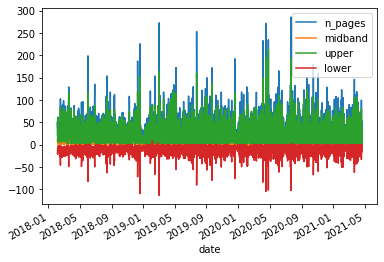

In [47]:
anomalies[['n_pages', 'midband', 'upper', 'lower']].plot()

### BONUS: Identify users who are viewing both the web dev and data science curriculum